In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# 1. GDP per capita in constant PPP dollars. fixed 2017 prices
[data source](https://www.gapminder.org/data/documentation/gd001/)

In [2]:
gdppcap = pd.read_csv('/kaggle/input/ppp-and-life-expectancy/gdp_pcap.csv')

In [3]:
gdppcap

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,599,599,599,599,599,599,599,599,599,...,4800,4910,5030,5150,5270,5390,5520,5650,5780,5920
1,Angola,465,466,469,471,472,475,477,479,481,...,24.8k,25.3k,25.9k,26.4k,26.9k,27.4k,28k,28.5k,29.1k,29.6k
2,Albania,585,587,588,590,592,593,595,597,598,...,54k,54.6k,55.2k,55.8k,56.4k,56.9k,57.5k,58.1k,58.7k,59.2k
3,Andorra,1710,1710,1710,1720,1720,1720,1730,1730,1730,...,79.3k,79.5k,79.8k,80.1k,80.4k,80.7k,81k,81.2k,81.5k,81.8k
4,UAE,1420,1430,1430,1440,1450,1450,1460,1460,1470,...,92.5k,92.6k,92.6k,92.7k,92.8k,92.9k,92.9k,93k,93.1k,93.1k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,24.5k,25k,25.5k,26k,26.5k,27k,27.6k,28.1k,28.6k,29.2k
191,Yemen,1260,1260,1270,1270,1270,1280,1280,1280,1290,...,6450,6600,6760,6930,7100,7270,7450,7630,7810,8000
192,South Africa,2180,2160,2130,2110,2090,1980,1980,2140,1880,...,44.7k,45.3k,45.9k,46.5k,47.2k,47.8k,48.4k,49k,49.6k,50.2k
193,Zambia,664,666,668,669,671,672,674,676,677,...,16k,16.3k,16.7k,17.1k,17.5k,17.9k,18.3k,18.7k,19.1k,19.6k


In [4]:
middle_east_countries = ['Bahrain', 'Sudan', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan',
                          'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia',
                          'Syria', 'Turkey', 'UAE', 'Yemen']

# Filter DataFrame for Middle East countries
ME_gdppcap = gdppcap[gdppcap['country'].isin(middle_east_countries)]

In [5]:
# make each country a column and put all years in the same column
ME_gdppcap = pd.melt(ME_gdppcap, id_vars='country', var_name='Year', value_name='GDP_Per_Capita')
ME_gdppcap = ME_gdppcap.pivot(index='Year', columns='country', values='GDP_Per_Capita').reset_index()

In [6]:
#drop years before 1946 and after 2017
ME_gdppcap = ME_gdppcap.drop(ME_gdppcap.head(146).index)
ME_gdppcap = ME_gdppcap.drop(ME_gdppcap.tail(83).index)

In [7]:
ME_gdppcap

country,Year,Bahrain,Egypt,Iran,Iraq,Israel,Jordan,Kuwait,Lebanon,Oman,Palestine,Qatar,Saudi Arabia,Sudan,Syria,Turkey,UAE,Yemen
146,1946,4600,2090,3870,2830,5250,3660,3730,5450,1320,4440,1690,4820,1730,4940,2680,1870,1870
147,1947,4860,2080,4000,2850,5490,3730,3920,5560,1350,4560,1730,5070,1780,4990,2770,1910,1870
148,1948,5150,2070,4130,2880,5750,3790,4340,5680,1390,3440,1780,5330,1830,5040,3090,1960,1870
149,1949,5440,2060,4270,2900,6020,3860,5700,5800,1420,2590,2190,5610,1890,5090,2880,2010,1870
150,1950,5760,2050,4410,2930,6300,3930,7480,5920,1460,2640,2700,5900,1940,5150,3090,2060,1870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2013,48.9k,10.3k,14.1k,9500,36.7k,11.5k,57.1k,18.2k,36.3k,6120,110k,46.4k,4690,7680,23.9k,62.4k,3690
214,2014,49.1k,10.3k,14.5k,9190,37.5k,10.6k,55.6k,16.8k,35k,5970,106k,47.3k,4780,6860,24.6k,64.3k,3580
215,2015,48.5k,10.5k,14k,9370,37.6k,9910,53.8k,16.6k,35.2k,6050,102k,48.5k,4720,6690,25.6k,68.1k,2510
216,2016,48.5k,10.8k,15k,10.4k,38.6k,9630,53.5k,17.2k,35.2k,6440,97.8k,48.7k,4730,6620,26k,71.2k,2210


In [8]:
# Function to convert 'k' to numeric values
def k_to_numeric(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    else:
        return value

In [9]:
# Apply the function to all elements in the DataFrame
ME_gdppcap = ME_gdppcap.applymap(k_to_numeric)

In [10]:
ME_gdppcap = ME_gdppcap.set_index('Year')

In [11]:
px.line(ME_gdppcap)

# 2. Life Expectancy
[data source](https://www.gapminder.org/data/documentation/gd004/)

In [12]:
life_expectaincy = pd.read_csv('/kaggle/input/ppp-and-life-expectancy/lex.csv')

In [13]:
life_expectancy =  life_expectaincy[life_expectaincy['country'].isin(middle_east_countries)]

In [14]:
life_expectancy

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
4,UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
17,Bahrain,30.3,30.3,30.3,30.3,30.3,30.3,30.3,30.3,30.3,...,85.5,85.6,85.7,85.8,85.9,86.0,86.1,86.2,86.3,86.4
51,Egypt,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,...,81.2,81.3,81.4,81.6,81.7,81.8,82.0,82.1,82.2,82.3
80,Iran,25.6,25.6,25.6,25.6,25.6,25.6,25.6,25.6,25.6,...,88.1,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1
81,Iraq,31.2,31.2,31.2,31.2,31.2,31.2,31.2,31.2,31.2,...,82.7,82.8,83.0,83.1,83.2,83.4,83.5,83.7,83.8,83.9
83,Israel,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,...,91.4,91.5,91.6,91.7,91.8,92.0,92.1,92.2,92.3,92.4
86,Jordan,31.7,31.7,31.7,31.7,31.7,31.7,31.7,31.7,31.7,...,88.2,88.3,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
95,Kuwait,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,...,90.7,90.8,90.9,91.0,91.2,91.3,91.4,91.5,91.6,91.7
97,Lebanon,29.7,29.7,29.7,29.7,29.7,29.7,29.7,29.7,29.7,...,85.8,85.9,86.0,86.1,86.2,86.3,86.4,86.5,86.7,86.8
133,Oman,32.3,32.3,32.3,32.3,32.3,32.3,32.3,32.3,32.3,...,84.0,84.1,84.2,84.3,84.5,84.6,84.7,84.8,84.9,85.0


In [15]:
life_expectancy = pd.melt(life_expectancy, id_vars='country', var_name='Year', value_name='Life_Expectancy')
life_expectancy = life_expectancy.pivot(index='Year', columns='country', values='Life_Expectancy').reset_index()

In [16]:
#drop years before 1946 and after 2017
life_expectancy = life_expectancy.drop(life_expectancy.head(146).index)
life_expectancy = life_expectancy.drop(life_expectancy.tail(83).index)

In [17]:
life_expectancy = life_expectancy.set_index('Year')

In [18]:
px.line(life_expectancy)

# 3. plot GDP_Per_Capita vs Life_expectanncy

In [19]:
# values in ME_gdppcap has an object dtype
# convert to float
ME_gdppcap[middle_east_countries] = ME_gdppcap[middle_east_countries].astype(float)

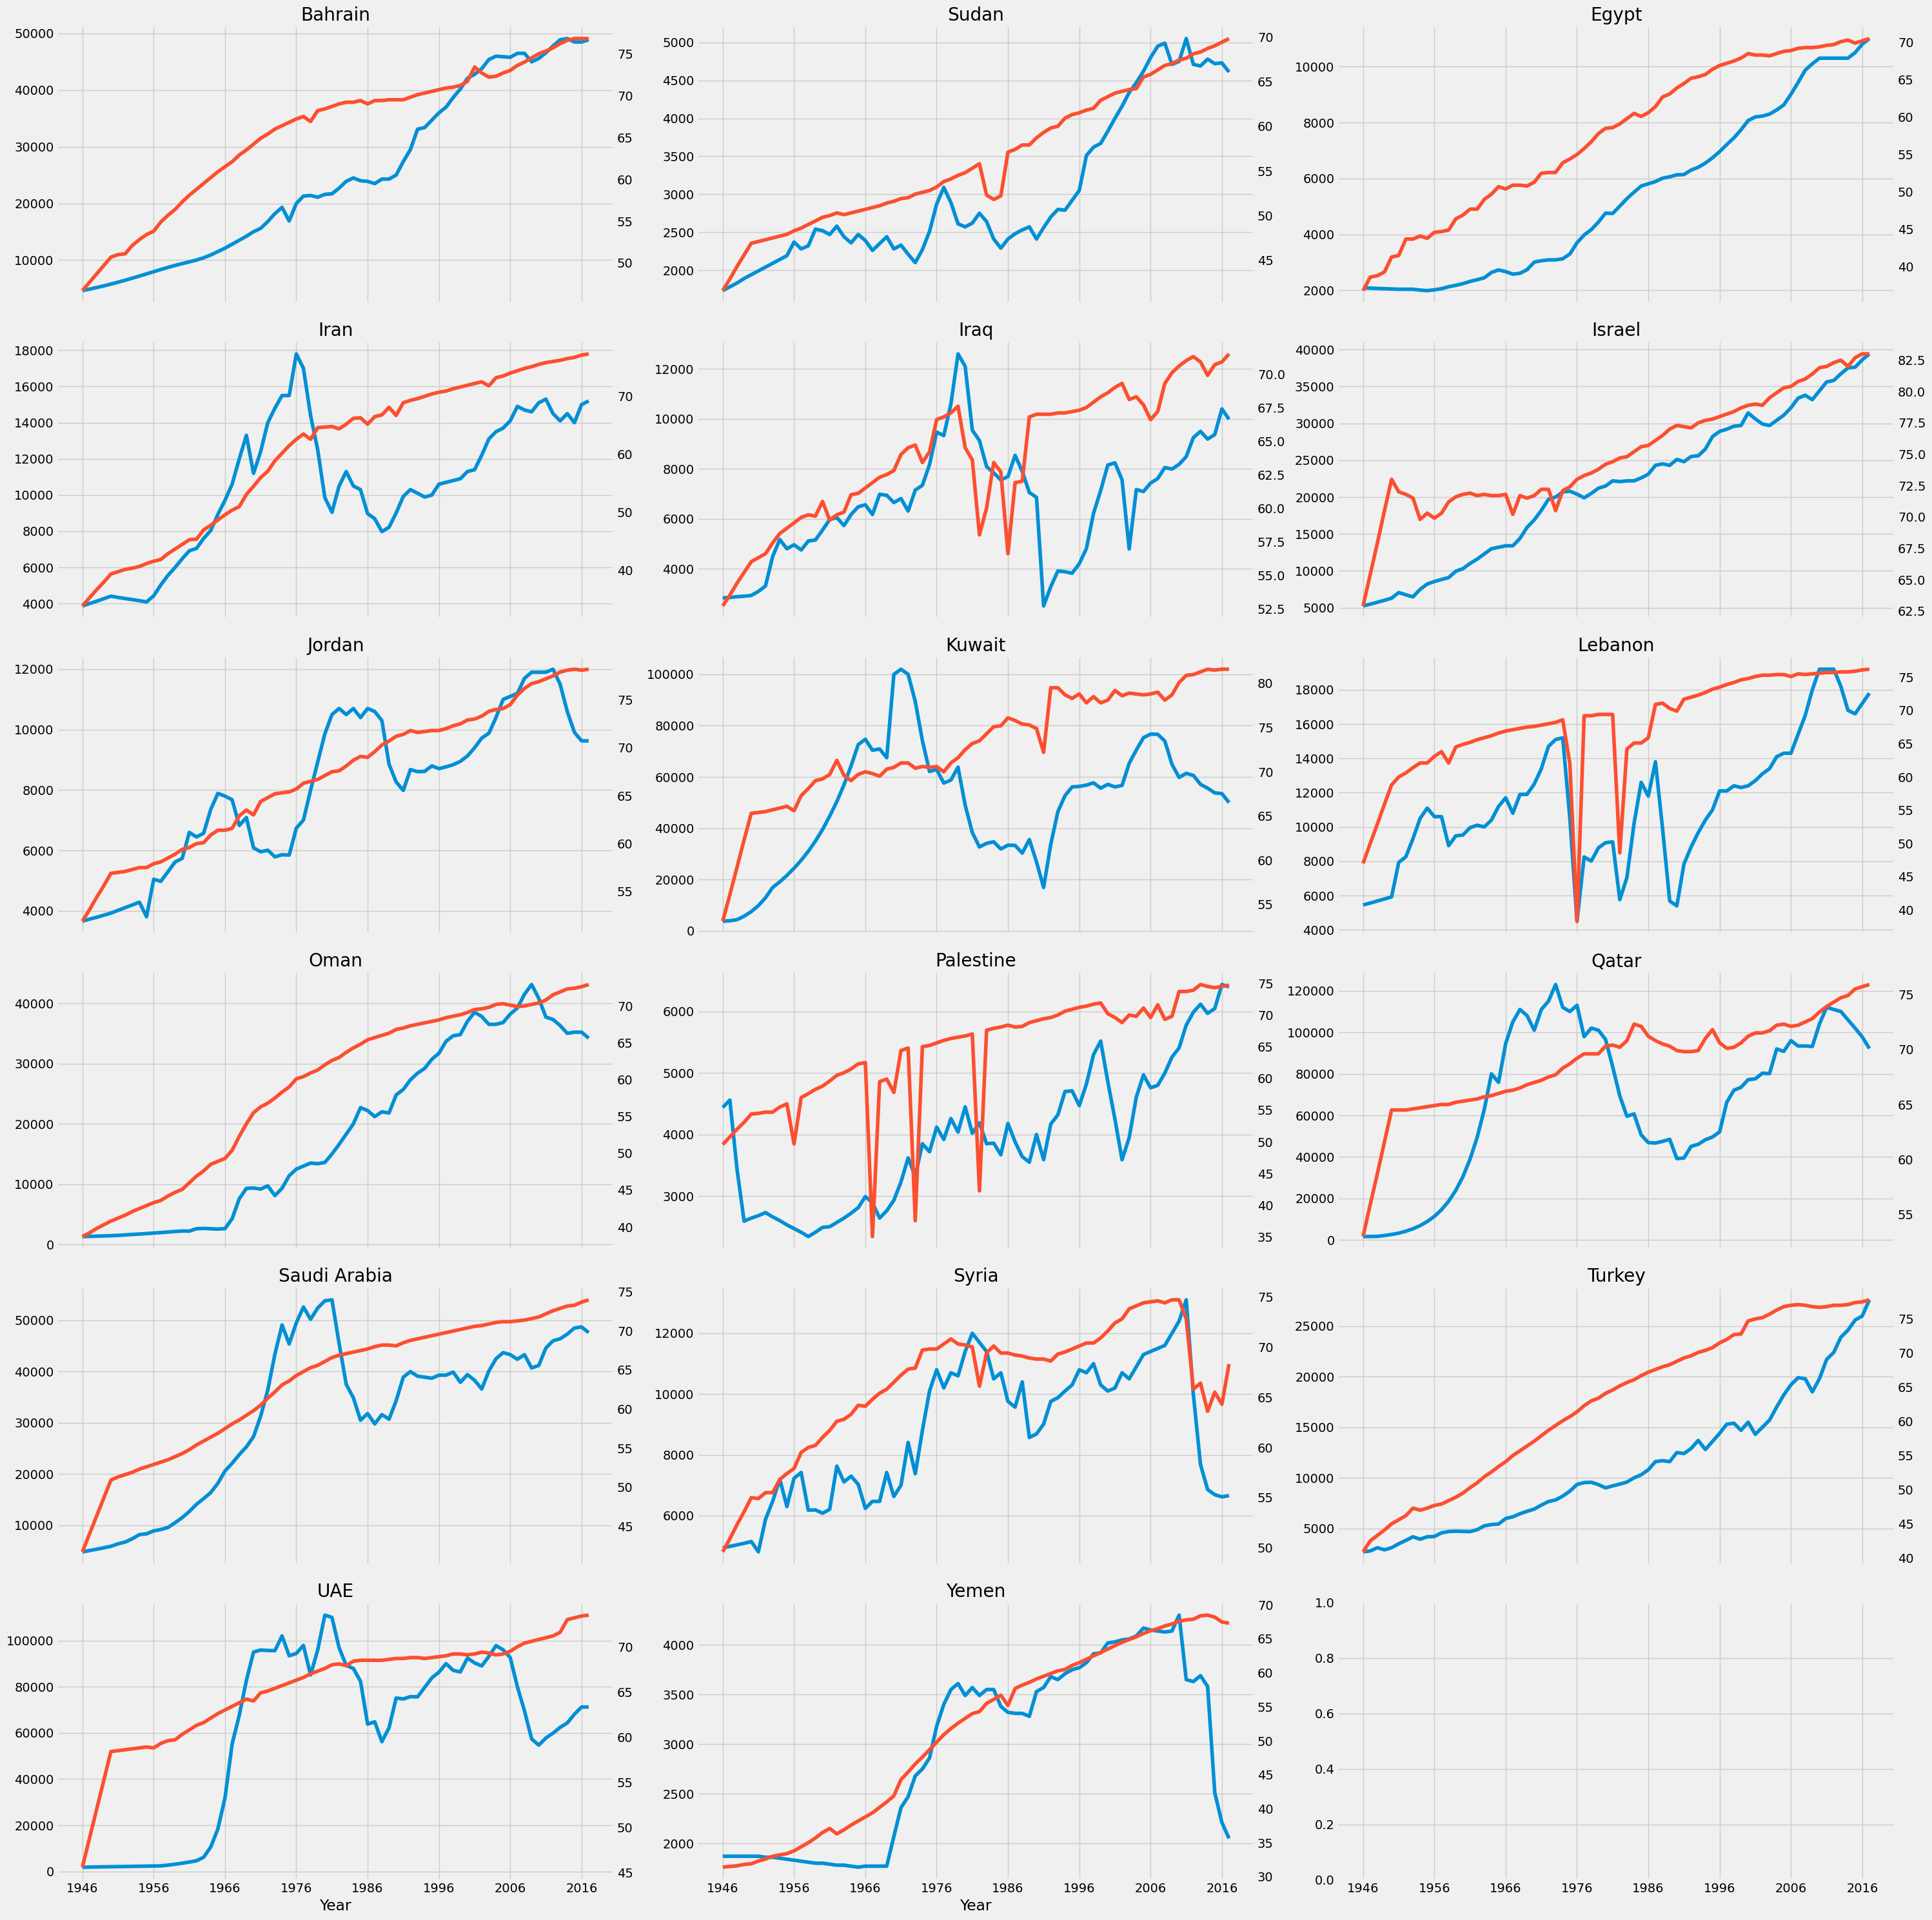

In [20]:
fig, axs = plt.subplots(6, 3, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for country in middle_east_countries:
    ax2 = axs[i].twinx()
    ME_gdppcap[country].plot(ax=axs[i], label='GDPperCap')
    life_expectancy[country].plot(ax=ax2, label='LifeExp', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(country)
    i += 1
plt.tight_layout()
plt.show()